In [19]:
import pandas as pd

df1 = pd.read_csv(r"C:\Users\YAMINI RAVICHANDRAN\OneDrive\ドキュメント\book recommendation\Audible_Catlog.csv")
df2 = pd.read_csv(r"C:\Users\YAMINI RAVICHANDRAN\OneDrive\ドキュメント\book recommendation\Audible_Catlog_Advanced_Features.csv")

print("Dataset 1 Info:")
print(df1.info(), "\n")

print("Dataset 2 Info:")
print(df2.info(), "\n")

print("Dataset 1 Preview:\n", df1.head(), "\n")
print("Dataset 2 Preview:\n", df2.head(), "\n")


Dataset 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Book Name          6368 non-null   object 
 1   Author             6368 non-null   object 
 2   Rating             6368 non-null   float64
 3   Number of Reviews  5737 non-null   float64
 4   Price              6365 non-null   float64
dtypes: float64(3), object(2)
memory usage: 248.9+ KB
None 

Dataset 2 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4464 entries, 0 to 4463
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Book Name          4464 non-null   object 
 1   Author             4464 non-null   object 
 2   Rating             4464 non-null   float64
 3   Number of Reviews  4043 non-null   float64
 4   Price              4464 non-null   int64  
 5   Description       

In [3]:
print("Missing values in Dataset 1:\n", df1.isnull().sum(), "\n")
print("Missing values in Dataset 2:\n", df2.isnull().sum(), "\n")

df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()

print("Dataset 1 shape after removing duplicates:", df1.shape)
print("Dataset 2 shape after removing duplicates:", df2.shape)


Missing values in Dataset 1:
 Book Name              0
Author                 0
Rating                 0
Number of Reviews    631
Price                  3
dtype: int64 

Missing values in Dataset 2:
 Book Name              0
Author                 0
Rating                 0
Number of Reviews    421
Price                  0
Description            6
Listening Time         0
Ranks and Genre        0
dtype: int64 

Dataset 1 shape after removing duplicates: (5439, 5)
Dataset 2 shape after removing duplicates: (4296, 8)


In [20]:
df = pd.merge(df1, df2, on=["Book Name", "Author"], how="outer")

print("Merged Dataset Info:\n", df.info(), "\n")

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7568 entries, 0 to 7567
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Book Name            7568 non-null   object 
 1   Author               7568 non-null   object 
 2   Rating_x             6819 non-null   float64
 3   Number of Reviews_x  6141 non-null   float64
 4   Price_x              6815 non-null   float64
 5   Rating_y             5000 non-null   float64
 6   Number of Reviews_y  4524 non-null   float64
 7   Price_y              5000 non-null   float64
 8   Description          4993 non-null   object 
 9   Listening Time       5000 non-null   object 
 10  Ranks and Genre      5000 non-null   object 
dtypes: float64(6), object(5)
memory usage: 650.5+ KB
Merged Dataset Info:
 None 



,Book Name,Author,Rating_x,Number of Reviews_x,Price_x,Rating_y,Number of Reviews_y,Price_y,Description,Listening Time,Ranks and Genre
0,"""Don't You Know Who I Am?"": How to Stay Sane i...",Ramani S. Durvasula PhD,4.8,170.0,836.0,NaN,NaN,NaN,NaN,NaN,NaN
1,"""Don't You Know Who I Am?"": How to Stay Sane i...",Ramani S. Durvasula PhD,4.8,170.0,836.0,NaN,NaN,NaN,NaN,NaN,NaN
2,#Girlboss,Sophia Amoruso,4.5,2260.0,615.0,4.5,2272.0,615.0,"Sorry, we just need to make sure you're not a ...",-1,-1
3,#Girlboss,Sophia Amoruso,4.5,2260.0,615.0,4.5,2272.0,615.0,"Penguin presents the unabridged downloadable, ...",-1,-1
4,#TheRealCinderella: #BestFriendsForever Series...,Yesenia Vargas,4.3,179.0,586.0,4.3,179.0,586.0,\n\nOops!\nIt's rush hour and traffic is pilin...,-1,-1


In [21]:
print(df[['Rating_x', 'Rating_y']].count())

df['Rating'] = df['Rating_x'].fillna(df['Rating_y'])

df.drop(columns=['Rating_x', 'Rating_y'], inplace=True)


Rating_x    6819
Rating_y    5000
dtype: int64


In [22]:
print(df.isnull().sum())


Book Name                 0
Author                    0
Number of Reviews_x    1427
Price_x                 753
Number of Reviews_y    3044
Price_y                2568
Description            2575
Listening Time         2568
Ranks and Genre        2568
Rating                    0
dtype: int64


In [23]:
df['Number of Reviews_x'].fillna(0, inplace=True)
df['Number of Reviews_y'].fillna(0, inplace=True)
df['Price_x'].fillna(df['Price_x'].median(), inplace=True)
df['Price_y'].fillna(df['Price_y'].median(), inplace=True)
df['Description'].fillna("No description available", inplace=True)
df['Listening Time'].fillna(0, inplace=True)
df['Ranks and Genre'].fillna("Unknown", inplace=True)


C:\Users\YAMINI RAVICHANDRAN\AppData\Local\Temp\ipykernel_29928\3726746278.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Number of Reviews_x'].fillna(0, inplace=True)
C:\Users\YAMINI RAVICHANDRAN\AppData\Local\Temp\ipykernel_29928\3726746278.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [24]:
df['Price'] = df[['Price_x', 'Price_y']].mean(axis=1, skipna=True)
df.drop(columns=['Price_x', 'Price_y'], inplace=True)


In [25]:
df['Number of Reviews'] = df[['Number of Reviews_x', 'Number of Reviews_y']].sum(axis=1, skipna=True)
df.drop(columns=['Number of Reviews_x', 'Number of Reviews_y'], inplace=True)


In [26]:
df.drop_duplicates(subset=['Book Name', 'Author'], keep='first', inplace=True)


In [14]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 6065 entries, 0 to 6389
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Book Name          6065 non-null   object 
 1   Author             6065 non-null   object 
 2   Description        6065 non-null   object 
 3   Listening Time     6065 non-null   object 
 4   Ranks and Genre    6065 non-null   object 
 5   Rating             6065 non-null   float64
 6   Price              6065 non-null   float64
 7   Number of Reviews  6065 non-null   float64
dtypes: float64(3), object(5)
memory usage: 426.4+ KB
None
                                           Book Name                   Author  \
0  "Don't You Know Who I Am?": How to Stay Sane i...  Ramani S. Durvasula PhD   
1                                          #Girlboss           Sophia Amoruso   
3  #TheRealCinderella: #BestFriendsForever Series...           Yesenia Vargas   
4                 10 Bedtime Stories

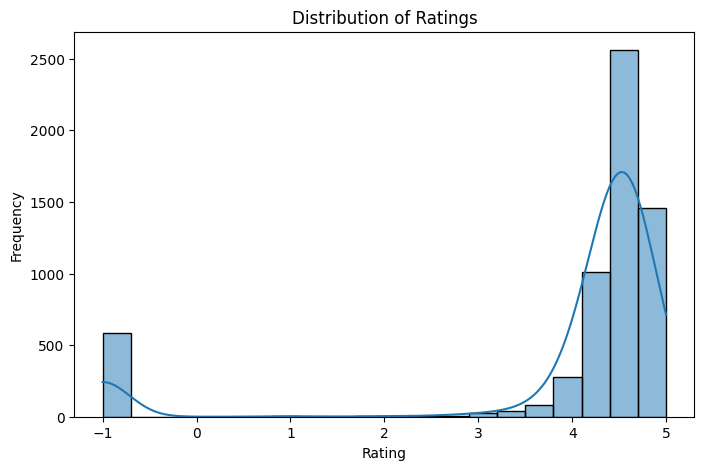

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [28]:
top_books = df[['Book Name', 'Author', 'Number of Reviews']].sort_values(by='Number of Reviews', ascending=False).head(10)
print(top_books)


                                              Book Name          Author  \
5596                              The Girl on the Train   Paula Hawkins   
5480                             The Fault in Our Stars      John Green   
6164                                    The Nightingale  Kristin Hannah   
1800  Fifty Shades of Grey: Book One of the Fifty Sh...     E. L. James   
6010                                        The Martian       Andy Weir   
4880  The Alchemist: A Fable About Following Your Dream    Paulo Coelho   
3236                                      Me Before You      Jojo Moyes   
2572                                            Inferno       Dan Brown   
3734                       Outlander: Outlander, Book 1  Diana Gabaldon   
6969                                Think and Grow Rich   Napoleon Hill   

      Number of Reviews  
5596           140199.0  
5480            87694.0  
6164            81797.0  
1800            76563.0  
6010            66551.0  
4880            56

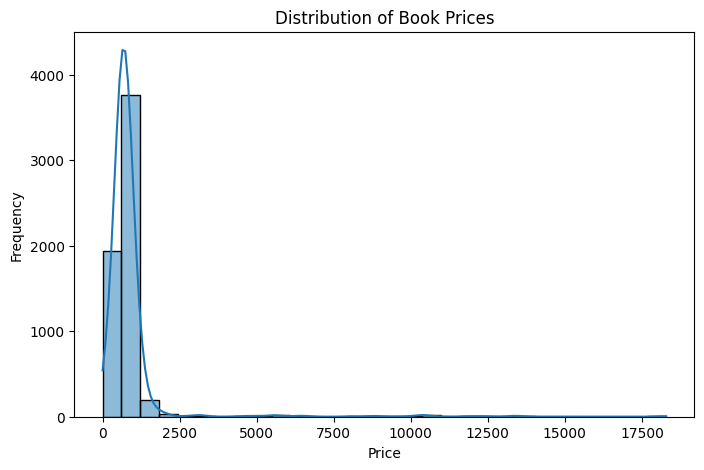

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Book Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


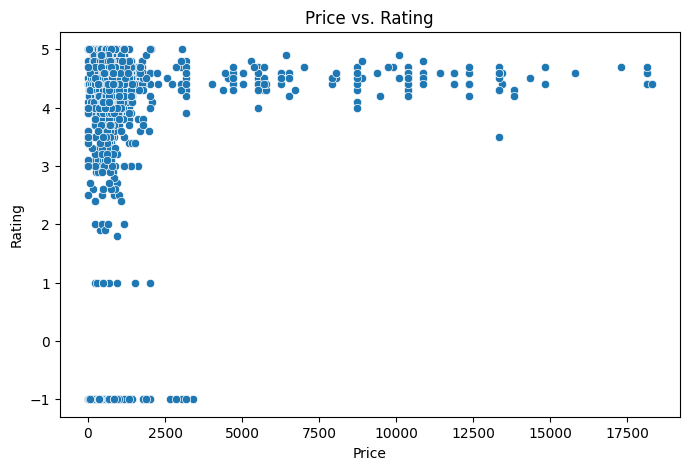

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Price'], y=df['Rating'])
plt.title('Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()


In [30]:
df.to_csv('data.csv', index=False)

In [31]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Load Data
df = pd.read_csv(r"C:\Users\YAMINI RAVICHANDRAN\OneDrive\ドキュメント\book recommendation\data.csv")  # Replace with your dataset path

# Preprocessing Function
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return " ".join(tokens)

# Apply Preprocessing
df['Processed_Description'] = df['Description'].apply(preprocess_text)

# NLP Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['Processed_Description'])

# Clustering using K-Means
num_clusters = 10  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(tfidf_matrix)

# Content-Based Recommendation
def recommend_books(book_name, df, tfidf_matrix):
    book_index = df[df['Book Name'] == book_name].index[0]
    similarity_scores = cosine_similarity(tfidf_matrix[book_index], tfidf_matrix).flatten()
    top_indices = similarity_scores.argsort()[-6:-1][::-1]  # Top 5 similar books
    return df.iloc[top_indices][['Book Name', 'Author', 'Rating']]

# Example Recommendation
book_to_recommend = "#Girlboss"
print("Recommended Books:")
print(recommend_books(book_to_recommend, df, tfidf_matrix))


[nltk_data] Downloading package punkt to C:\Users\YAMINI
[nltk_data]     RAVICHANDRAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\YAMINI
[nltk_data]     RAVICHANDRAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\YAMINI RAVICHANDRAN\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\YAMINI RAVICHANDRAN\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Pr

Recommended Books:
                                              Book Name  \
2720      Morning, Noon, and Night: Erotica for Couples   
2710  Monsoon: The Indian Ocean and the Future of Am...   
2709                           Monsieur Lecoq: Volume I   
2701              Models: Attract Women Through Honesty   
2687  Miracle Morning Millionaires: What the Wealthy...   

                     Author  Rating  
2720  Alison Tyler (editor)     3.4  
2710       Robert D. Kaplan     4.5  
2709         Emile Gaboriau     3.8  
2701            Mark Manson     4.7  
2687              Hal Elrod     4.7  


In [32]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_csv(r"C:\Users\YAMINI RAVICHANDRAN\OneDrive\ドキュメント\book recommendation\data.csv")  # Replace with actual dataset file

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    tokens = text.split()
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply preprocessing
df["Processed_Description"] = df["Description"].fillna("No Description").apply(preprocess_text)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["Processed_Description"])

# Clustering using K-Means
num_clusters = 10  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)
df["Cluster"] = kmeans.labels_

# Content-Based Recommendation System
def recommend_books(book_name, top_n=5):
    idx = df[df["Book Name"].str.lower() == book_name.lower()].index
    if len(idx) == 0:
        return "Book not found. Try another title."
    idx = idx[0]
    
    similarity_scores = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()
    top_indices = similarity_scores.argsort()[-(top_n+1):-1][::-1]
    
    return df.iloc[top_indices][["Book Name", "Author", "Rating"]]

# Example usage
print(recommend_books("The Alchemist"))  # Replace with any book title


                                              Book Name            Author  \
1396  FREE: Audible Interview with Donna Leon: Audib...        Donna Leon   
3961  The Art of Selling to the Affluent: How to Att...      Matt Oechsli   
3960  The Art of Saying No: How to Stand Your Ground...  Damon Zahariades   
3958                           The Art of Profitability  Adrian Slywotzky   
3957  The Art of Noticing: Rediscover What Really Ma...        Rob Walker   

      Rating  
1396    -1.0  
3961     4.3  
3960     4.3  
3958     4.4  
3957     4.7  


In [33]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_csv(r"C:\Users\YAMINI RAVICHANDRAN\OneDrive\ドキュメント\book recommendation\data.csv")  

# Text Preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    tokens = text.split()
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df["Processed_Description"] = df["Description"].fillna("No Description").apply(preprocess_text)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["Processed_Description"])

# K-Means Clustering
num_clusters = 10  
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df["Cluster"] = kmeans.fit_predict(tfidf_matrix)

# Hybrid Recommendation System
def hybrid_recommend(book_name, top_n=5):
    # Find book index
    book_idx = df[df["Book Name"].str.lower() == book_name.lower()].index
    if len(book_idx) == 0:
        return "Book not found. Try another title."
    book_idx = book_idx[0]

    # Find the book's cluster
    book_cluster = df.loc[book_idx, "Cluster"]
    cluster_books = df[df["Cluster"] == book_cluster]

    # Compute similarity within the cluster
    cluster_tfidf_matrix = vectorizer.transform(cluster_books["Processed_Description"])
    book_vector = vectorizer.transform([df.loc[book_idx, "Processed_Description"]])
    
    similarity_scores = cosine_similarity(book_vector, cluster_tfidf_matrix).flatten()

    # Rank books based on similarity
    cluster_books["Similarity"] = similarity_scores
    recommended_books = cluster_books.sort_values(by=["Similarity", "Rating"], ascending=[False, False])

    return recommended_books[["Book Name", "Author", "Rating"]].head(top_n)

# Example Usage
print(hybrid_recommend("The Alchemist"))


                                             Book Name               Author  \
57   27 Essential Principles of Story: Master the S...  Daniel Joshua Rubin   
454                        Ashtavakra Mahagitaa Vol. 1                 OSHO   
500  Awaking Wonder: Opening Your Child's Heart to ...       Sally Clarkson   
670  Born to Run Barefoot?: Sorting Through the Myt...       Chas Gillespie   
718  Buddha the First Quantum Physicist: Bridging 2...                 OSHO   

     Rating  
57      5.0  
454     5.0  
500     5.0  
670     5.0  
718     5.0  


C:\Users\YAMINI RAVICHANDRAN\AppData\Local\Temp\ipykernel_29928\2456715495.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_books["Similarity"] = similarity_scores
